In [108]:
# import lib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons,make_classification,make_regression

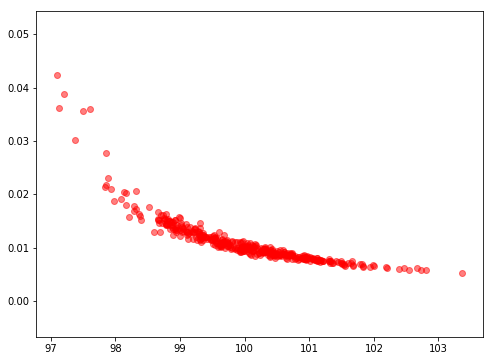

In [321]:
# See the data 
# X, y = make_moons(n_samples=300, noise=0.0)
X,y = make_regression(n_samples=400, n_features=1,noise=5); X = np.concatenate((X,y[:,None]),1) + 100
X[:,1] = 1/X[:,1]
# X = X - X.mean(0)
plt.figure(figsize=(8,6))
# plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
# plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)
plt.scatter(X[:, 0], X[:,1], color='red', alpha=0.5)
plt.show()

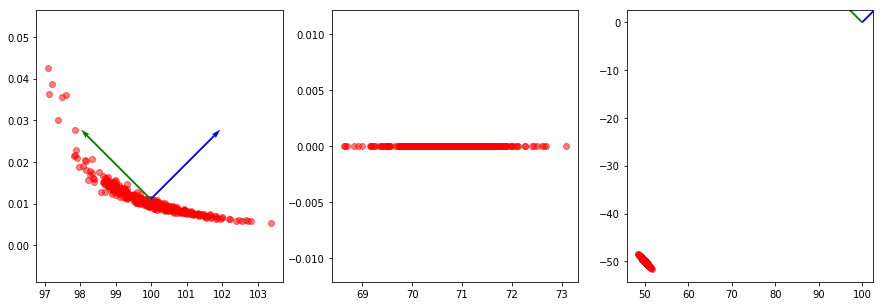

In [322]:
# traditional PCA

# 1. projection
cov = X.T @ X / X.shape[1]
evalue,evector = np.linalg.eig(np.corrcoef(X.T))
idx = np.argsort(evalue)[::-1]
evecs = evector[:,idx]
projected = X @ evecs[:,0]
recovered = projected[:,None] @ evecs[:,0][:,None].T

# 2. recover
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:,1], color='red', alpha=0.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[0,0],evector[0,1], color=['b'], scale=2.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[1,0],evector[1,1], color=['g'], scale=2.5)

plt.subplot(1, 3, 2)
plt.scatter(projected,np.zeros(len(projected)), color='red', alpha=0.5)

plt.subplot(1, 3, 3)
plt.scatter(recovered[:, 0], recovered[:,1], color='red', alpha=0.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[0,0],evector[0,1], color=['b'], scale=2.5)
plt.quiver(X.mean(0)[0], X.mean(0)[1], evector[1,0],evector[1,1], color=['g'], scale=2.5)

plt.show()

In [289]:
# simple method
w = np.random.randn(2,1)
print('Before : ',np.sqrt(np.sum(w**2)),end=' ')
w = w/(np.sqrt(np.sum(w**2)))
print(' After : ',np.sqrt(np.sum(w**2)))


Before :  1.052441564378402  After :  1.0
(2, 1)


In [295]:
np.cov(X,rowvar=False)
np.corrcoef(X.T)

array([[1.        , 0.79963287],
       [0.79963287, 1.        ]])

# Reference 
1. results, P., & Rieble, N. (2016). PCA in numpy and sklearn produces different results. Cross Validated. Retrieved 9 April 2019, from https://stats.stackexchange.com/questions/235882/pca-in-numpy-and-sklearn-produces-different-results
2. Python, H., & Eunice, J. (2017). How to make two plots side-by-side using Python. Stack Overflow. Retrieved 9 April 2019, from https://stackoverflow.com/questions/42818361/how-to-make-two-plots-side-by-side-using-python
3. 